Importing Libraries

In [25]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

\#Servers Contacted

In [26]:
n = 50

In [27]:
file_path = "resolver_log_D.jsonl"

data = []
with open(file_path, "r") as file:
    for line in file:
        data.append(json.loads(line))  

Average #Servers Contacted for all URLs =  {3.53}


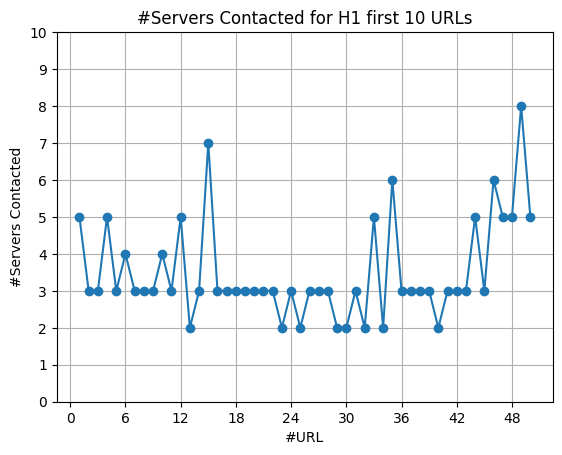

In [31]:
servers_contacted = []
for i in range(len(data)):
    servers_contacted.append(len(data[i].get("servers_contacted")))

print("Average #Servers Contacted for all URLs = ", {sum(servers_contacted)/len(servers_contacted)})

x = list(range(1,n+1))
plt.plot(x, servers_contacted[:n], marker="o")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(bottom=0, top = 10)
plt.xlabel("#URL")
plt.ylabel("#Servers Contacted")
plt.title("#Servers Contacted for H1 first 10 URLs")
plt.grid()


Latency Statistics

In [32]:
n = 10

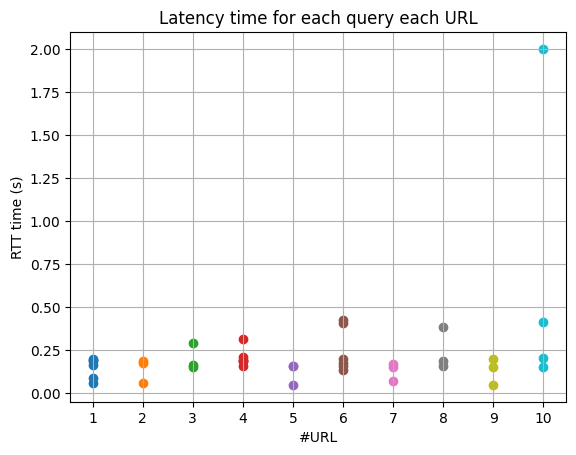

In [33]:
traces = {}
for i in range(n):
    t = []
    for j in range(len(data[i].get("trace"))):
        rtt = data[i].get("trace")[j].get("rtt")
        if rtt != -1:
            t.append(rtt)
        else:
            t.append(2)
    traces[f"{i+1}"] = t

for x, ys in traces.items():
    plt.scatter([x]*len(ys), ys, label=f"Group {x}")
plt.xlabel("#URL")
plt.ylabel("RTT time (s)")
plt.title("Latency time for each query each URL")
plt.grid()
plt.show()


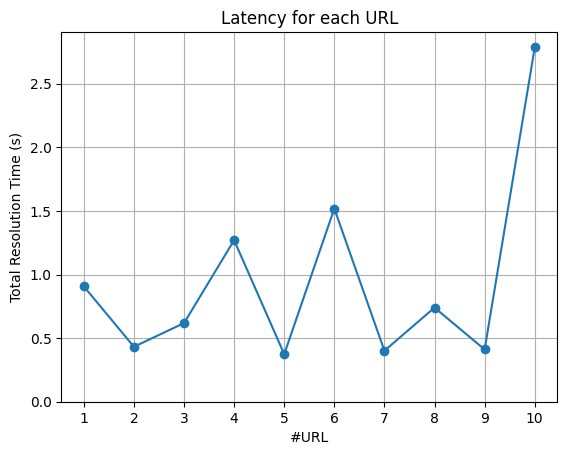

In [34]:
latency = []
for i in range(n):
    latency.append(data[i].get("total_time"))

x = list(range(1,n+1))
plt.plot(x, latency, marker="o")
plt.xlabel("#URL")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel("Total Resolution Time (s)")
plt.title("Latency for each URL")
plt.ylim(bottom=0)
plt.grid()


In [40]:
file_path = "resolver_log_cache.jsonl"

data = []
with open(file_path, "r") as file:
    for line in file:
        data.append(json.loads(line))  

In [44]:
data[0].get("trace")

[{'server_ip': '198.41.0.4',
  'rtt': 0.20794129371643066,
  'step': 'Query',
  'response': {'authority': ['uk. 172800 IN NS dns1.nic.uk.\nuk. 172800 IN NS dns3.nic.uk.\nuk. 172800 IN NS nsc.nic.uk.\nuk. 172800 IN NS nsa.nic.uk.\nuk. 172800 IN NS nsd.nic.uk.\nuk. 172800 IN NS dns2.nic.uk.\nuk. 172800 IN NS dns4.nic.uk.\nuk. 172800 IN NS nsb.nic.uk.'],
   'additional': ['dns1.nic.uk. 172800 IN A 213.248.216.1',
    'dns1.nic.uk. 172800 IN AAAA 2a01:618:400::1',
    'dns3.nic.uk. 172800 IN A 213.248.220.1',
    'dns3.nic.uk. 172800 IN AAAA 2a01:618:404::1',
    'nsc.nic.uk. 172800 IN A 156.154.102.3',
    'nsc.nic.uk. 172800 IN AAAA 2610:a1:1009::3',
    'nsa.nic.uk. 172800 IN A 156.154.100.3',
    'nsa.nic.uk. 172800 IN AAAA 2001:502:ad09::3',
    'nsd.nic.uk. 172800 IN A 156.154.103.3',
    'nsd.nic.uk. 172800 IN AAAA 2610:a1:1010::3',
    'dns2.nic.uk. 172800 IN A 103.49.80.1',
    'dns2.nic.uk. 172800 IN AAAA 2401:fd80:400::1',
    'dns4.nic.uk. 172800 IN A 43.230.48.1',
    'dns4.ni

Cache Statistics

In [ ]:
filename = "resolver_log_cache.jsonl"
target = "HIT"
count = 0

with open(filename, "r", encoding="utf-8") as f:
    for line in f:
        if not line.strip():
            continue
        try:
            data = json.loads(line)
            line_text = json.dumps(data)  
            count += line_text.count(target)
        except json.JSONDecodeError:
            continue  
print(f"The string '{target}' appears {count} times in the file.")


The string 'HIT' appears 21 times in the file.


In [2]:
Total_number_of_times_cache_searched = 542
Cache_hit_rate = 21/542
print(Cache_hit_rate)

0.03874538745387454
